In [115]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
import calendar
from matplotlib.colors import LinearSegmentedColormap
%matplotlib inline 

In [116]:
#Import data into Python environment
df = pd.read_csv('Comcast_telecom_complaints_data.csv',header = None,skiprows=1)

In [117]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,4/8/2015,4-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,5/7/2015,5-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No


In [118]:
#Renaming header for dataset
df.to_csv('Comcast_telecom_complaints_data.csv',header=['Ticket','Customer_Complaint','Date','Date_month_year','Time','Received_Via','City','State','Zip_code','Status','Filing_on_behalf'],index=False)
df =pd.read_csv('Comcast_telecom_complaints_data.csv')

In [119]:
df.head()

,Ticket,Customer_Complaint,Date,Date_month_year,Time,Received_Via,City,State,Zip_code,Status,Filing_on_behalf
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,4/8/2015,4-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,5/7/2015,5-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No


In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Ticket              2224 non-null   object
 1   Customer_Complaint  2224 non-null   object
 2   Date                2224 non-null   object
 3   Date_month_year     2224 non-null   object
 4   Time                2224 non-null   object
 5   Received_Via        2224 non-null   object
 6   City                2224 non-null   object
 7   State               2224 non-null   object
 8   Zip_code            2224 non-null   int64 
 9   Status              2224 non-null   object
 10  Filing_on_behalf    2224 non-null   object
dtypes: int64(1), object(10)
memory usage: 191.2+ KB


In [121]:
#Dropping unused columns from table
df = df.drop(['Ticket','Date','Zip_code'], axis = 1)

In [122]:
df.head()

,Customer_Complaint,Date_month_year,Time,Received_Via,City,State,Status,Filing_on_behalf
0,Comcast Cable Internet Speeds,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,Closed,No
1,Payment disappear - service got disconnected,4-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,Closed,No
2,Speed and Service,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,Closed,Yes
3,Comcast Imposed a New Usage Cap of 300GB that ...,5-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,Open,Yes
4,Comcast not working and no service to boot,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,Solved,No


In [123]:
#Splitting Date_month_year colunm into two columns, namely 'Date' & 'Month'
df['Date'] = pd.DatetimeIndex(df['Date_month_year']).day
df['Month'] = pd.DatetimeIndex(df['Date_month_year']).month
df.head()

,Customer_Complaint,Date_month_year,Time,Received_Via,City,State,Status,Filing_on_behalf,Date,Month
0,Comcast Cable Internet Speeds,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,Closed,No,22,4
1,Payment disappear - service got disconnected,4-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,Closed,No,4,8
2,Speed and Service,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,Closed,Yes,18,4
3,Comcast Imposed a New Usage Cap of 300GB that ...,5-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,Open,Yes,5,7
4,Comcast not working and no service to boot,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,Solved,No,26,5


In [124]:
#Applying abbrevation on Month column
df['Month'] = df['Month'].apply(lambda x: calendar.month_abbr[x])

In [125]:
df.head()

,Customer_Complaint,Date_month_year,Time,Received_Via,City,State,Status,Filing_on_behalf,Date,Month
0,Comcast Cable Internet Speeds,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,Closed,No,22,Apr
1,Payment disappear - service got disconnected,4-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,Closed,No,4,Aug
2,Speed and Service,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,Closed,Yes,18,Apr
3,Comcast Imposed a New Usage Cap of 300GB that ...,5-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,Open,Yes,5,Jul
4,Comcast not working and no service to boot,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,Solved,No,26,May


In [126]:
df.isna().any()

Customer_Complaint    False
Date_month_year       False
Time                  False
Received_Via          False
City                  False
State                 False
Status                False
Filing_on_behalf      False
Date                  False
Month                 False
dtype: bool

In [127]:
monthly_complaints = df['Month'].value_counts().to_frame()
new_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
monthly_complaints = monthly_complaints.reindex(new_order, axis=0).reset_index().rename(columns={'index':'Month','Month':'Complaints'})
monthly_complaints


,Month,Complaints
0,Jan,55
1,Feb,59
2,Mar,45
3,Apr,375
4,May,317
5,Jun,1046
6,Jul,49
7,Aug,67
8,Sep,55
9,Oct,53


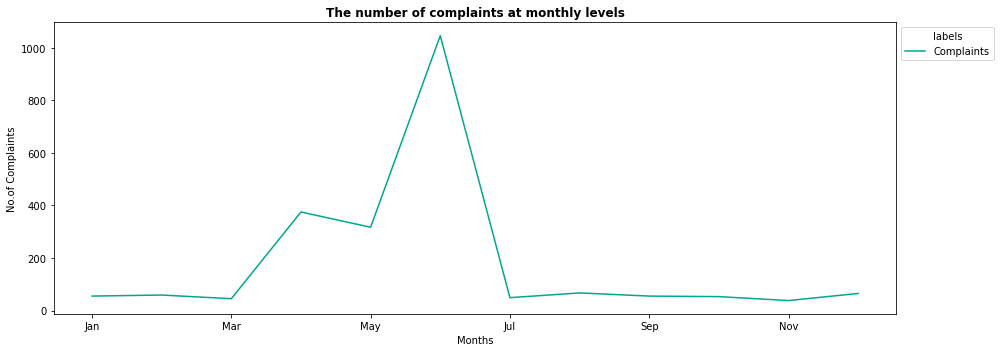

In [128]:
#The trend chart for the number of complaints at monthly granularity levels
#Highest complaints received in Month June

plt.rcParams["figure.figsize"] = (14,5)
monthly_complaints.plot.line(x='Month',y='Complaints',color='#00A68D')
plt.xlabel('Months')
plt.ylabel('No.of Complaints')
plt.title('The number of complaints at monthly levels',weight='bold')
plt.legend( title='labels',bbox_to_anchor=(1.0, 1), loc='upper left')
plt.tight_layout()
plt.show()

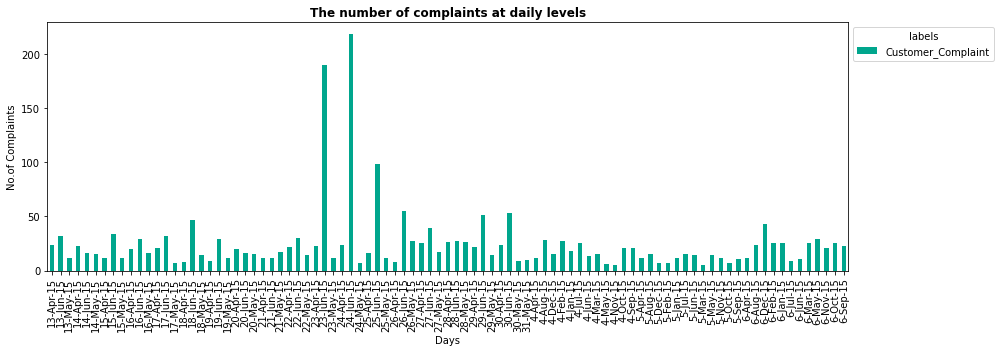

In [129]:
#The trend chart for the number of complaints at daily granularity levels
plt.figure(figsize=(14,5))
df['Customer_Complaint'].groupby(df.Date_month_year).count().plot.bar(color='#00A68D')
plt.xlabel('Days')
plt.ylabel('No.of Complaints')
plt.title('The number of complaints at daily levels',weight='bold')
plt.legend( title='labels',bbox_to_anchor=(1.0, 1), loc='upper left')
plt.tight_layout()
plt.show()

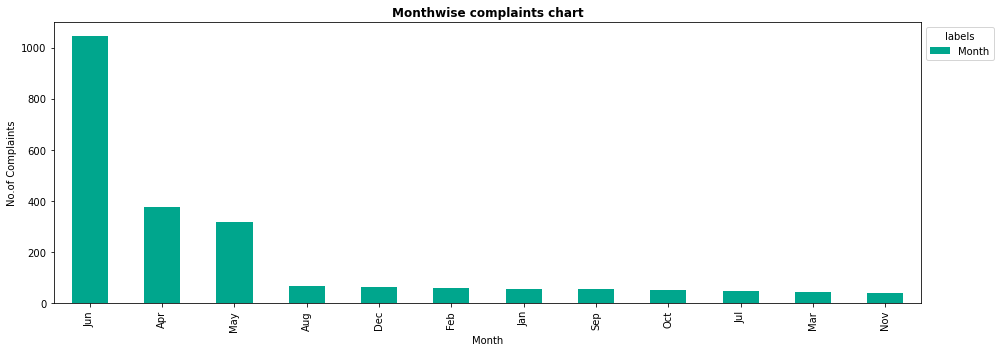

In [130]:
#Monthwise complaints chart
plt.figure(figsize=(14,5))
df['Month'].value_counts().plot.bar(color='#00A68D')
plt.xlabel('Month')
plt.ylabel('No.of Complaints')
plt.title('Monthwise complaints chart',weight='bold')
plt.legend( title='labels',bbox_to_anchor=(1.0, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [131]:
#Table with the frequency of complaint types
df['Customer_Complaint'].value_counts().nlargest(10)

Comcast                     83
Comcast Internet            18
Comcast Data Cap            17
comcast                     13
Comcast Billing             11
Data Caps                   11
Comcast Data Caps           11
Unfair Billing Practices     9
Comcast data cap             8
Comcast internet             8
Name: Customer_Complaint, dtype: int64

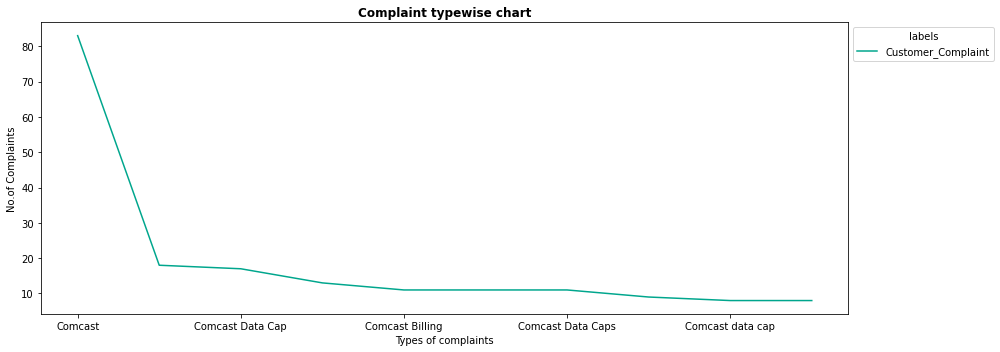

In [132]:
#Which complaint types are maximum i.e., around internet, network issues, or across any other domains
plt.figure(figsize=(14,5))
df['Customer_Complaint'].value_counts().nlargest(10).plot.line(color='#00A68D')
plt.xlabel('Types of complaints')
plt.ylabel('No.of Complaints')
plt.title('Complaint typewise chart',weight='bold')
plt.legend( title='labels',bbox_to_anchor=(1.0, 1), loc='upper left')
plt.tight_layout()
plt.show()

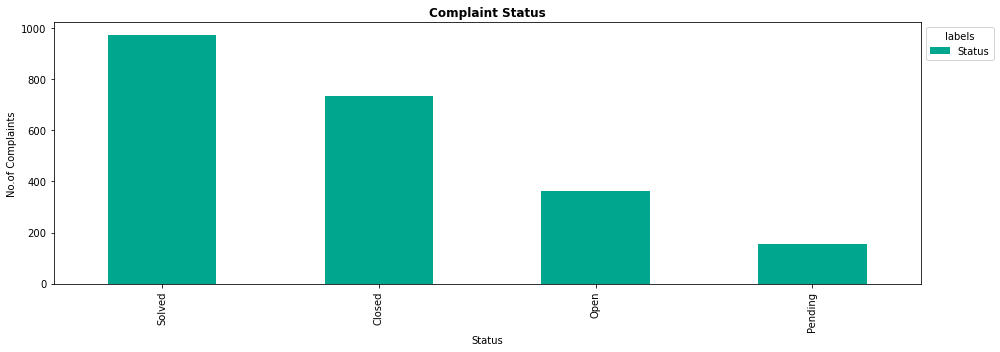

In [133]:
#Complaint status information based on its type i.e., Solved,Closed,Open,Pending
plt.figure(figsize=(14,5))
df['Status'].value_counts().plot.bar(color='#00A68D')
plt.xlabel('Status')
plt.ylabel('No.of Complaints')
plt.title('Complaint Status',weight='bold')
plt.legend( title='labels',bbox_to_anchor=(1.0, 1), loc='upper left')
plt.tight_layout()
plt.show()

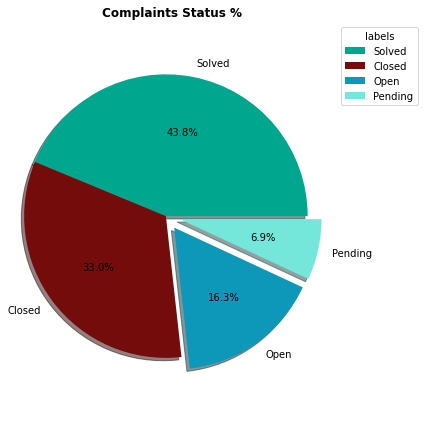

In [134]:
plt.figure(figsize=(6,6))
explode = (0,0,0.1,0.1)
colors = ['#00A68D','#730C0B','#0d98ba','#75E6DA']
plt.pie(df['Status'].value_counts(),explode=explode, labels=df['Status'].value_counts().index[:],colors=colors,autopct='%1.1f%%',shadow=True)
plt.title('Complaints Status %',weight='bold')
plt.axis('equal')
plt.legend( title='labels',bbox_to_anchor=(1.0, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [135]:
#Create a new categorical variable with value as Open and Closed
#Open & Pending is to be categorized as Open and Closed & Solved is to be categorized as Closed
df['Status'].replace('Closed','Closed', inplace=True)
df['Status'].replace('Solved','Closed', inplace=True)
df['Status'].replace('Open','Open', inplace=True)
df['Status'].replace('Pending','Open', inplace=True)

In [136]:
df['Status'].value_counts()

Closed    1707
Open       517
Name: Status, dtype: int64

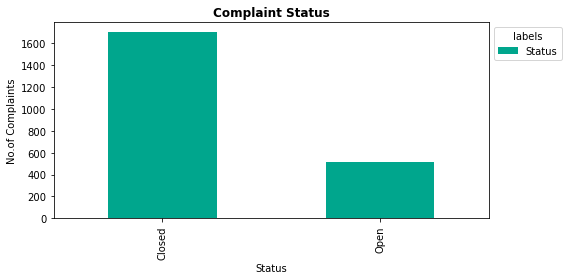

In [137]:
plt.figure(figsize=(8,4))
df['Status'].value_counts().plot.bar(color='#00A68D')
plt.xlabel('Status')
plt.ylabel('No.of Complaints')
plt.title('Complaint Status',weight='bold')
plt.legend( title='labels',bbox_to_anchor=(1.0, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [138]:
df['State'].unique()

array(['Maryland', 'Georgia', 'Michigan', 'California', 'New Mexico',
       'Indiana', 'Virginia', 'Illinois', 'Pennsylvania', 'Massachusetts',
       'Oregon', 'Texas', 'New Hampshire', 'Minnesota', 'Tennessee',
       'Colorado', 'Florida', 'Alabama', 'Washington', 'New York',
       'New Jersey', 'Maine', 'Missouri', 'West Virginia', 'Montana',
       'Mississippi', 'Connecticut', 'Vermont', 'Kentucky',
       'South Carolina', 'Ohio', 'Utah', 'Delaware', 'Arkansas', 'Nevada',
       'Louisiana', 'Kansas', 'Arizona', 'North Carolina', 'Rhode Island',
       'District Of Columbia', 'District of Columbia', 'Iowa'],
      dtype=object)

In [139]:
#Statewise status of complaints 
State_count = df.groupby(['State','Status']).count()['City'].to_frame().rename(columns={'City':'Counts'})
State_count

Counts
State         Status        
Alabama       Closed      17
              Open         9
Arizona       Closed      14
              Open         6
Arkansas      Closed       6
...                      ...
Virginia      Open        11
Washington    Closed      75
              Open        23
West Virginia Closed       8
              Open         3

[77 rows x 1 columns]

In [140]:
State_status = pd.crosstab(df.State,df.Status)
State_status.head()

Status,Closed,Open
State,,
Alabama,17,9
Arizona,14,6
Arkansas,6,0
California,159,61
Colorado,58,22


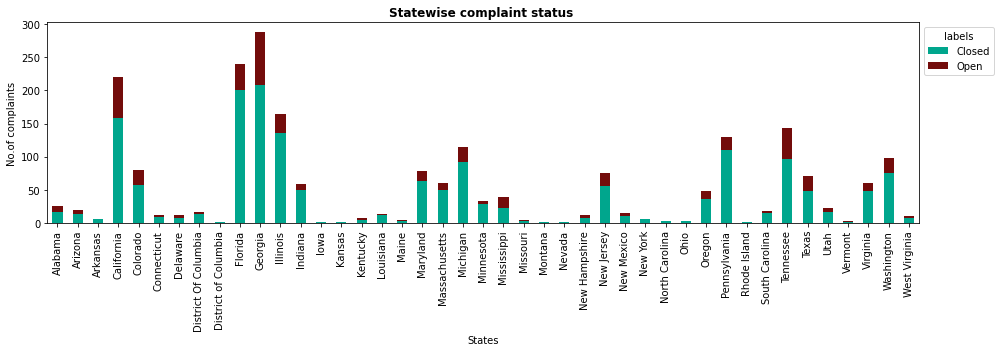

In [141]:
#State wise status of complaints in a stacked bar chart
colors = ['#00A68D','#730C0B']
cmap1 = LinearSegmentedColormap.from_list("my_colormap", colors)
State_status.plot(kind='bar', stacked=True, colormap=cmap1,figsize=(14, 5))
plt.xlabel('States')
plt.ylabel('No.of complaints')
plt.title('Statewise complaint status ',weight='bold')
plt.legend( title='labels',bbox_to_anchor=(1.0, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Insights on: 

In [142]:
#Which state has the maximum complaints
df['State'].value_counts().head(1).to_frame()

,State
Georgia,288


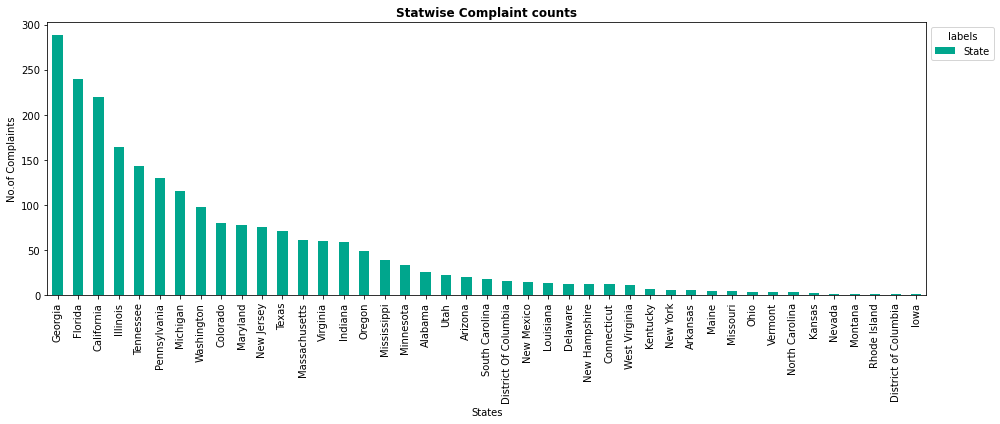

In [143]:
#State wise count of complaints
plt.figure(figsize=(14,6))
df["State"].value_counts().plot.bar(color = '#00A68D')
plt.xlabel('States')
plt.ylabel('No.of Complaints')
plt.title('Statwise Complaint counts',weight='bold')
plt.legend( title='labels',bbox_to_anchor=(1.0, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [144]:
#Which state has the highest percentage of unresolved complaints
unresolved_complaints = df.groupby(['State','Status']).size().unstack().fillna(0)
unresolved_complaints.sort_values('Closed',axis=0,ascending = False)[:1]

Status,Closed,Open
State,,
Georgia,208.0,80.0


In [145]:
unresolved_complaints['unresolved'] = unresolved_complaints['Open']/unresolved_complaints['Open'].sum()*100

In [146]:
unresolved_complaints.sort_values('unresolved',axis=0,ascending = False)[:1]

Status,Closed,Open,unresolved
State,,,
Georgia,208.0,80.0,15.473888


In [147]:
#The percentage of complaints resolved till date,
#which were received through the Internet and customer care calls

In [148]:
resolved_complaints = df.groupby(['Received_Via','Status']).size().unstack().fillna(0)

In [149]:
resolved_complaints['resolved'] = resolved_complaints['Closed']/resolved_complaints['Closed'].sum()*100

In [150]:
resolved_complaints['resolved']

Received_Via
Customer Care Call    50.615114
Internet              49.384886
Name: resolved, dtype: float64

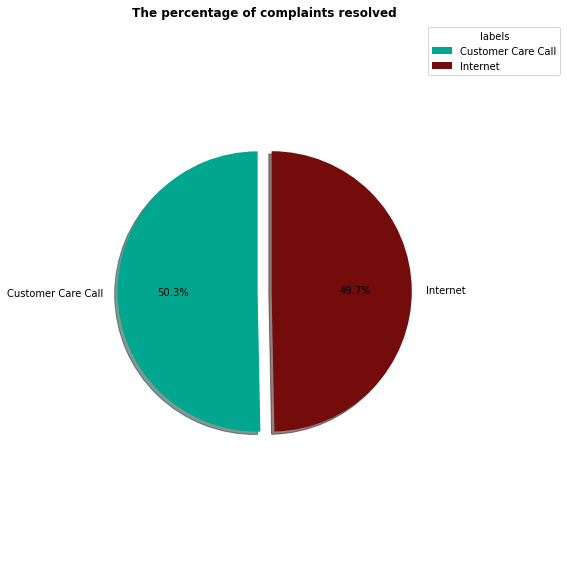

In [151]:
plt.figure(figsize=(8,8))
explode = (0,0.1)
colors = ['#00A68D','#730C0B']
plt.pie(df['Received_Via'].value_counts(), explode=explode,labels=df['Received_Via'].value_counts().index[:],colors=colors,autopct='%1.1f%%',shadow=True,startangle=90)
plt.title('The percentage of complaints resolved',weight='bold')
plt.axis('equal')
plt.legend( title='labels',bbox_to_anchor=(1.0, 1), loc='upper left')
plt.tight_layout()
plt.show()

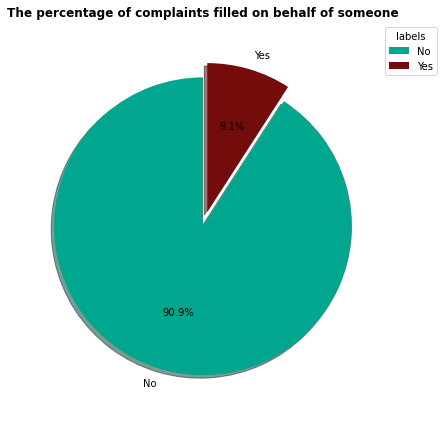

In [152]:
#The percentage of complaints filled on behalf of someone
plt.figure(figsize=(6,6))
explode = (0,0.1)
colors = ['#00A68D','#730C0B']
plt.pie(df['Filing_on_behalf'].value_counts(), explode=explode,labels=df['Filing_on_behalf'].value_counts().index[:],colors=colors,autopct='%1.1f%%',shadow=True,startangle=90)
plt.title('The percentage of complaints filled on behalf of someone',weight='bold')
plt.axis('equal')
plt.legend( title='labels',bbox_to_anchor=(1.0, 1), loc='upper left')
plt.tight_layout()
plt.show()